In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# Muat dataset Breast Cancer Wisconsin 
data = load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['target'] = data.target 
# Lihat beberapa baris dari dataset
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

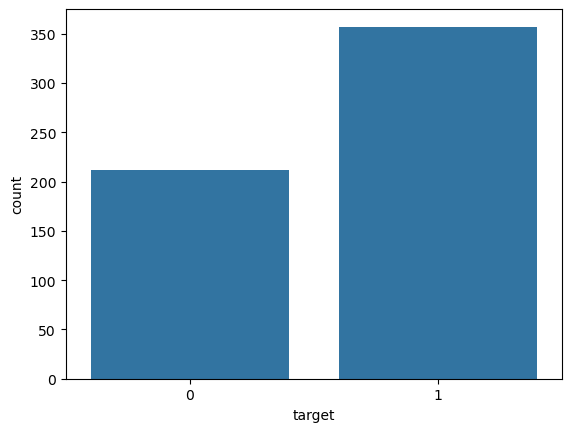

In [9]:
# Lihat informasi umum 
print(df.info()) 
# Hitung statistik deskriptif 
print(df.describe()) 
# Distribusi target (benign vs malignant) 
print(df['target'].value_counts()) 
# Visualisasi distribusi diagnosis (benign=0, malignant=1) 
sns.countplot(x='target', data=df) 
plt.show() 

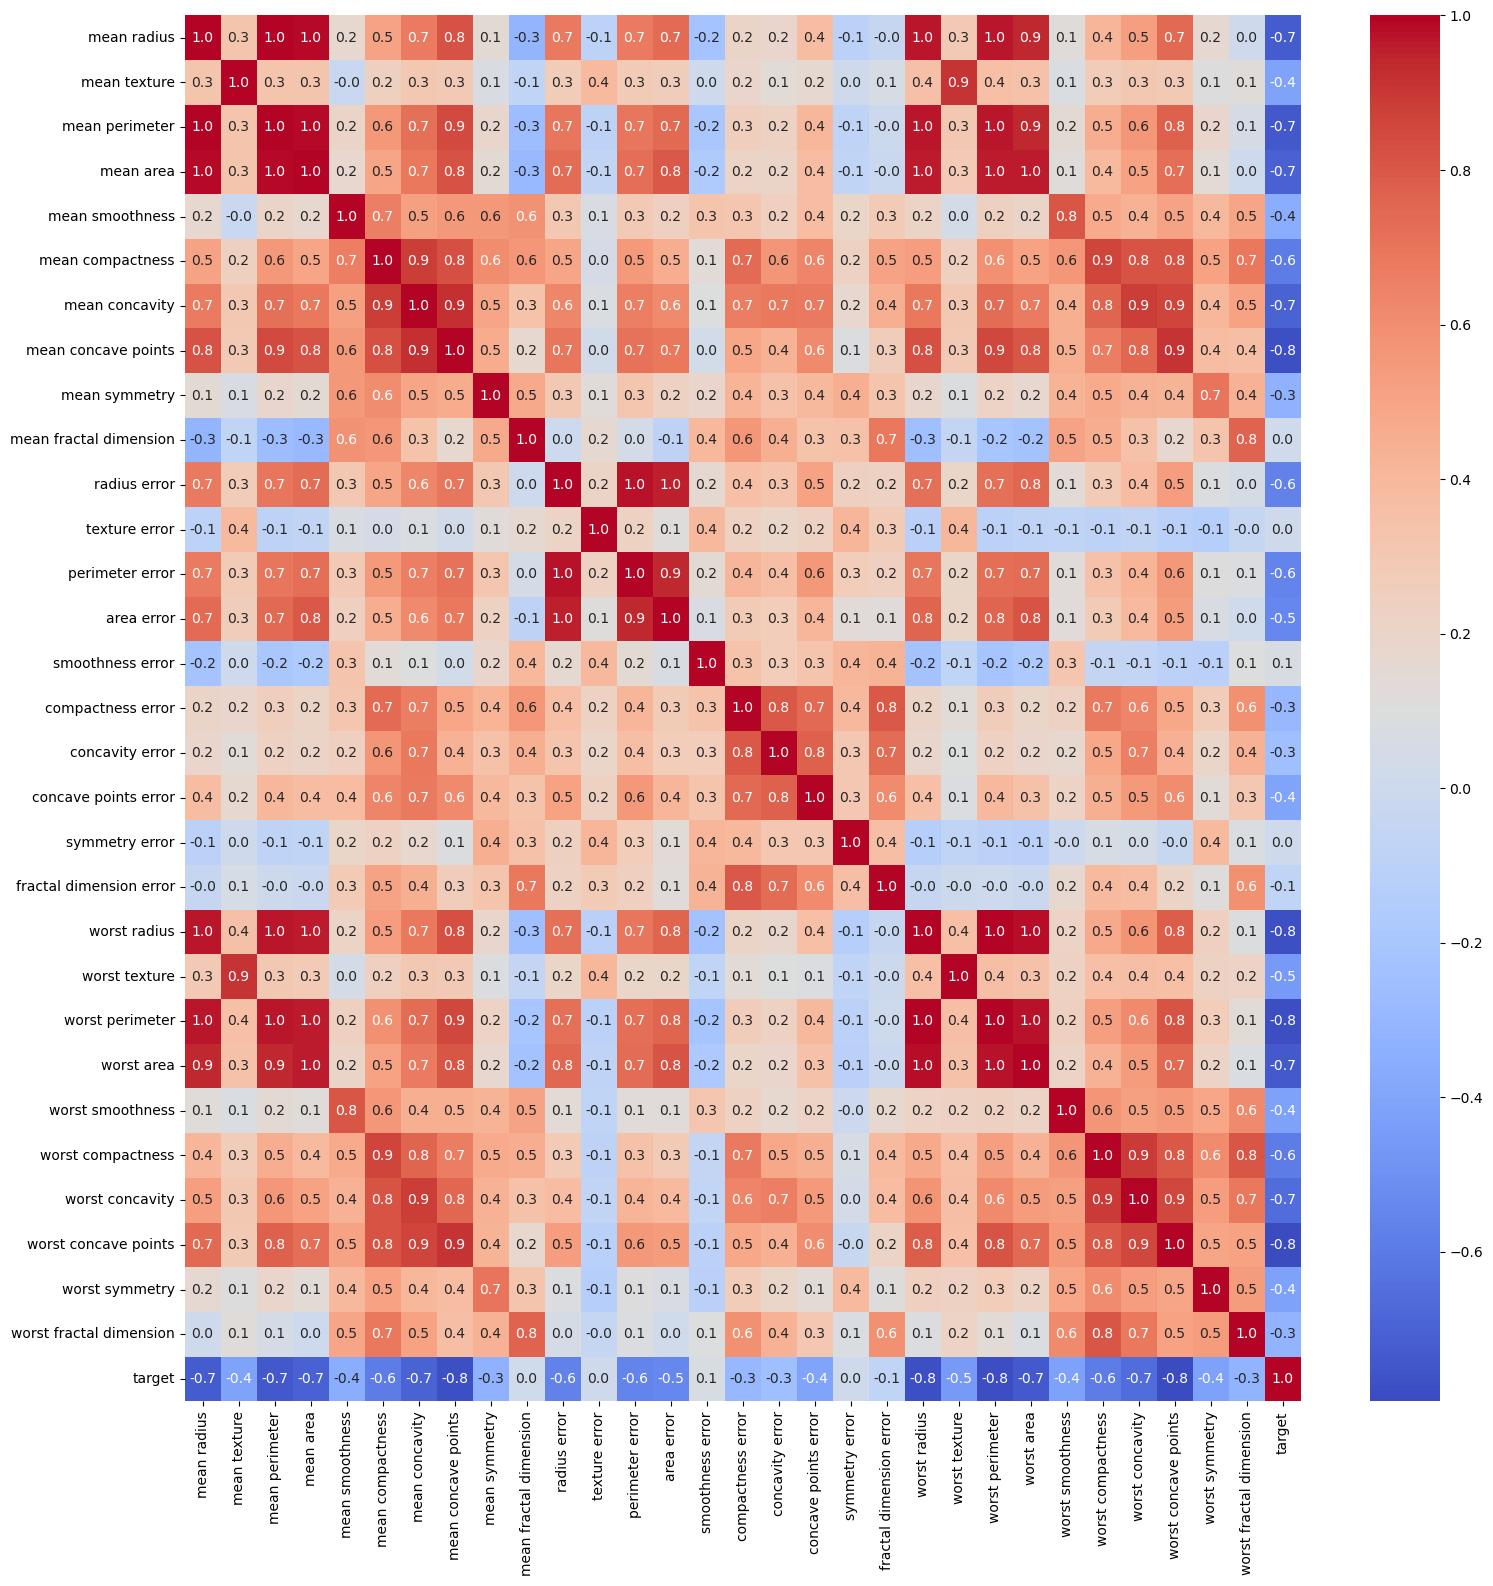

In [23]:
# Korelasi antara fitur 
corr_matrix = df.corr() 
# Visualisasi korelasi dalam bentuk heatmap 
plt.figure(figsize=(18,18)) 
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm') 
plt.show()

In [15]:
# Pisahkan fitur dan target 
X = df.drop('target', axis=1) 
y = df['target'] 

#untuk membuat model klasifikasi, kita bagi data jadi data training dan data testing
#data training digunakan untuk membuat model (x_train, y_train)
#data testing untuk menguji model (x_test, y_test)

# Bagi dataset menjadi data latih dan data uji dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Standarisasi fitur 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [31]:
X_train, y_train

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 68         9.029         17.33           58.79      250.5          0.10660   
 181       21.090         26.57          142.70     1311.0          0.11410   
 63         9.173         13.86           59.20      260.9          0.07721   
 248       10.650         25.22           68.01      347.0          0.09657   
 60        10.170         14.88           64.55      311.9          0.11340   
 ..           ...           ...             ...        ...              ...   
 71         8.888         14.64           58.79      244.0          0.09783   
 106       11.640         18.33           75.17      412.5          0.11420   
 270       14.290         16.82           90.30      632.6          0.06429   
 435       13.980         19.62           91.12      599.5          0.10600   
 102       12.180         20.52           77.22      458.7          0.08013   
 
      mean compactness  mean concavity  mean conca

In [17]:
# Inisialisasi model Logistic Regression 
#untuk mengelompokkan pendekatannyalebih dekat ke bening atau malignant
model = LogisticRegression() #model baru dibuat
# Latih model 
model.fit(X_train_scaled, y_train) #model sudah belajar based on data training (sudah pintar)
# Prediksi pada data uji yaitu menguji apakah target yang dihasilkan oleh model sama dengan target yang sudah ada di y_test
y_pred = model.predict(X_test_scaled) #proses memprediksi dan menghasilkan y_pred

Accuracy: 0.97


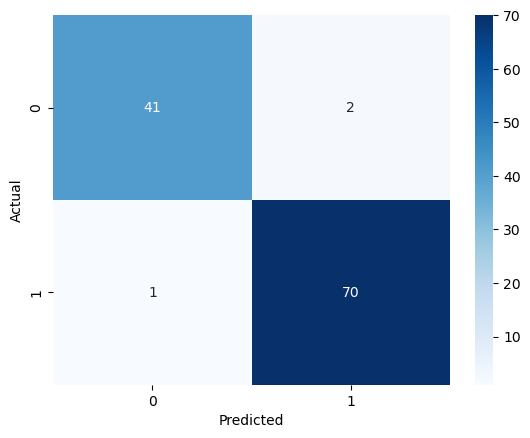

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [19]:
# Evaluasi akurasi 
accuracy = accuracy_score(y_test, y_pred) #membandingkan y_test dan y_pred
print(f'Accuracy: {accuracy:.2f}') 
# Matriks confusion 
conf_matrix = confusion_matrix(y_test, y_pred) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show() 
# Laporan klasifikasi 
print(classification_report(y_test, y_pred)) 

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Gunakan K-fold Cross Validation (misalnya 5-fold)
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)

print(f'Random Forest Cross-Validation Scores: {cv_scores_rf}')
print(f'Average Random Forest Cross-Validation Score: {cv_scores_rf.mean()}')

# Inisialisasi model SVM
svm_model = SVC()

# K-fold cross-validation untuk SVM
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5)

print(f'SVM Cross-Validation Scores: {cv_scores_svm}')
print(f'Average SVM Cross-Validation Score: {cv_scores_svm.mean()}')


Random Forest Cross-Validation Scores: [0.92982456 0.93859649 0.99122807 0.97368421 0.97345133]
Average Random Forest Cross-Validation Score: 0.9613569321533924
SVM Cross-Validation Scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Average SVM Cross-Validation Score: 0.9121720229777983


Random Forest Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



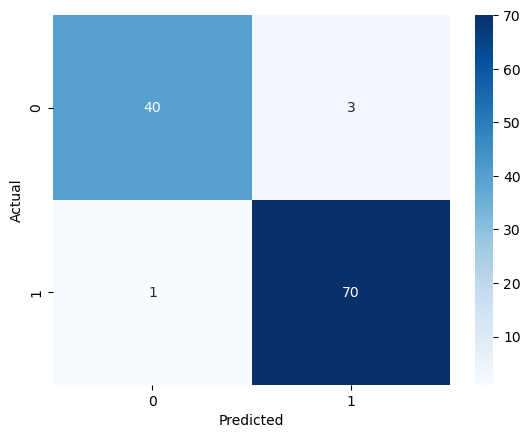

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model pada data latih
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



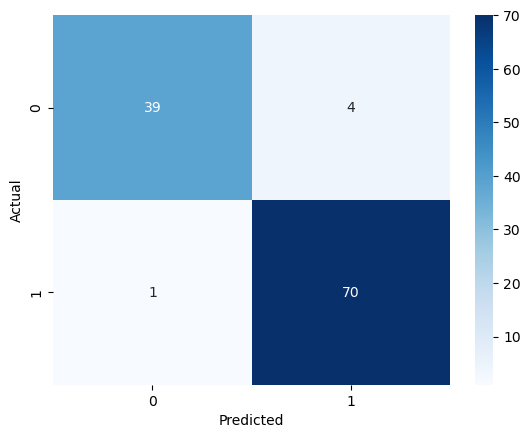

In [27]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Latih model pada data latih
svm_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [33]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset kanker payudara dari sklearn
data = load_breast_cancer()
X = data.data  # Fitur
y = data.target  # Label

# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi data
print(f'Dimensi fitur: {X.shape}, Dimensi label: {y.shape}')

Dimensi fitur: (569, 30), Dimensi label: (569,)


In [35]:
# Melakukan K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Evaluasi dengan cross_val_score
rf_scores = cross_val_score(rf_model, X, y, cv=kfold)

# Menampilkan hasil
print(f"Skor K-fold Cross Validation (Random Forest): {rf_scores}")
print(f"Rata-rata skor: {np.mean(rf_scores)}")

Skor K-fold Cross Validation (Random Forest): [0.95614035 0.96491228 0.93859649 0.96491228 0.96460177]
Rata-rata skor: 0.9578326346840551


Akurasi Random Forest: 0.9649122807017544
Laporan Klasifikasi Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Fitur-fitur terpenting menurut Random Forest:
1. Fitur worst area (Pentingnya: 0.15389236463205394)
2. Fitur worst concave points (Pentingnya: 0.14466326620735528)
3. Fitur mean concave points (Pentingnya: 0.10620998844591638)
4. Fitur worst radius (Pentingnya: 0.07798687515738047)
5. Fitur mean concavity (Pentingnya: 0.06800084191430111)
6. Fitur worst perimeter (Pentingnya: 0.06711483267839194)
7. Fitur mean perimeter (Pentingnya: 0.053269746128179675)
8. Fitur mean radius (Pentingnya: 0.048703371737755234)
9. Fitur mean area (Pentingnya: 0.04755500886018552)
10. Fitur worst concavity (

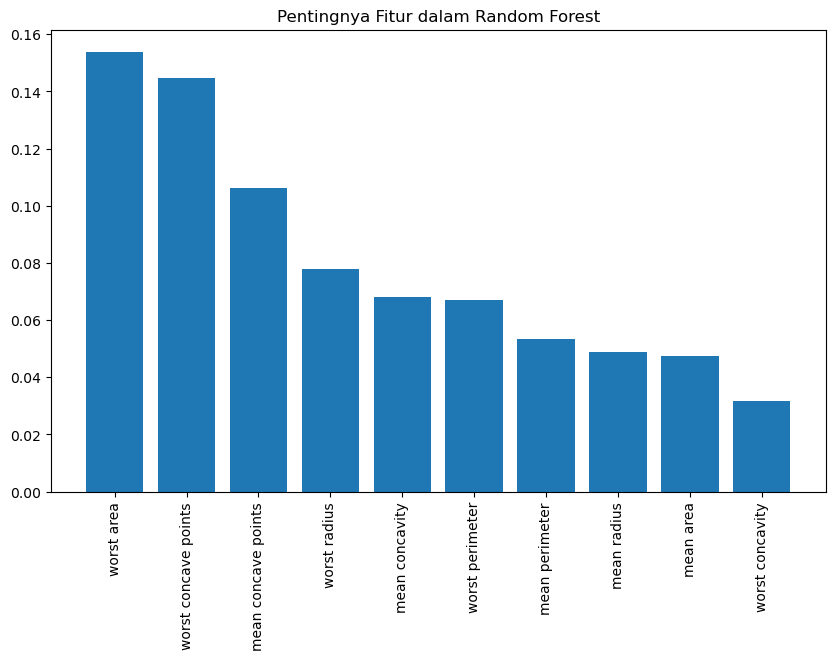

In [37]:
# Melatih model Random Forest
rf_model.fit(X_train, y_train)

# Memprediksi pada test set
y_pred_rf = rf_model.predict(X_test)

# Evaluasi hasil Random Forest
print(f"Akurasi Random Forest: {accuracy_score(y_test, y_pred_rf)}")
print("Laporan Klasifikasi Random Forest:\n", classification_report(y_test, y_pred_rf))

# Analisis pentingnya fitur
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Menampilkan 10 fitur terpenting
print("Fitur-fitur terpenting menurut Random Forest:")
for i in range(10):
    print(f"{i + 1}. Fitur {data.feature_names[indices[i]]} (Pentingnya: {importances[indices[i]]})")

# Visualisasi pentingnya fitur
plt.figure(figsize=(10, 6))
plt.title("Pentingnya Fitur dalam Random Forest")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [data.feature_names[i] for i in indices[:10]], rotation=90)
plt.show()